11410122 Ланч-бокс с приборами двухуровневый

In [1]:
! pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import copy
from copy import deepcopy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


------------

In [3]:
data = pd.read_csv('/content/11410122(17.03.2022-17.06.2022).csv', sep=';')

In [4]:
data

,Дата,Продажи,Остаток,Цена,Со скидкой и промо,Скидка,Цена со скидкой,Промокод,СПП,Цена с СПП,Сумма продаж,Комментариев,Рейтинг
0,2022-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-17,4,401.0,2442.0,561.0,77.0,561.0,0.0,0.0,561.0,2244,332.0,4.0
2,2022-06-16,6,404.0,2442.0,561.0,77.0,561.0,0.0,0.0,561.0,3366,332.0,4.0
3,2022-06-15,3,410.0,2442.0,561.0,77.0,561.0,0.0,0.0,561.0,1683,332.0,4.0
4,2022-06-14,1,413.0,2442.0,561.0,77.0,561.0,0.0,0.0,561.0,561,332.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Среднее (в день),6 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3 436,66 ₽",NaN,NaN
96,Дней с наличием,88 дней,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Среднее при наличии,6 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3 525,38 ₽",NaN,NaN
98,Потенциал,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"337 769,00 ₽",NaN,NaN


Возьмем данные за период с 18.03.2022 по 15.06.2022. 

In [5]:
data = data[3:93]

In [6]:
data = data.sort_values(by='Дата').reset_index(drop=True) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Дата                90 non-null     object 
 1   Продажи             90 non-null     object 
 2   Остаток             90 non-null     float64
 3   Цена                90 non-null     float64
 4   Со скидкой и промо  90 non-null     float64
 5   Скидка              90 non-null     float64
 6   Цена со скидкой     90 non-null     float64
 7   Промокод            90 non-null     float64
 8   СПП                 90 non-null     float64
 9   Цена с СПП          90 non-null     float64
 10  Сумма продаж        90 non-null     object 
 11  Комментариев        90 non-null     float64
 12  Рейтинг             90 non-null     float64
dtypes: float64(10), object(3)
memory usage: 9.3+ KB


In [8]:
data['Дата'] = pd.to_datetime(data['Дата'], format='%Y-%m-%d')

In [9]:
data['Продажи'] = data['Продажи'].astype('int')
data['Сумма продаж'] = data['Сумма продаж'].astype('float64')

In [10]:
data = data[['Дата', 'Продажи', 'Остаток', 'Цена', 'Со скидкой и промо', 'Скидка', 'Сумма продаж',
       'Комментариев', 'Рейтинг']]

In [11]:
data.columns = ['Дата', 'Продажи', 'Остаток', 'Цена', 'Цена_со_скидкой', 'Скидка',
       'Сумма_продаж', 'Комментариев', 'Рейтинг']

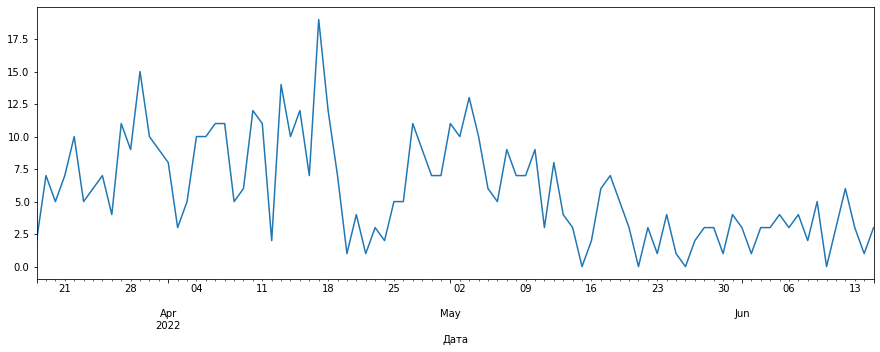

In [12]:
data.set_index('Дата')['Продажи'].plot(figsize=(15,5))

Проведем сезонную декомпозицию продаж.

In [13]:
decomposed = seasonal_decompose(data.set_index('Дата')['Продажи'])

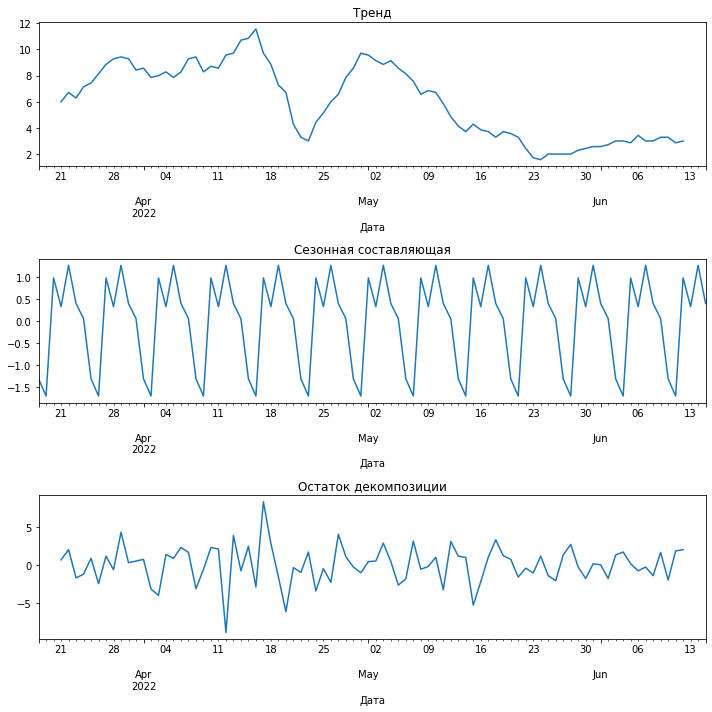

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток декомпозиции')

plt.tight_layout()

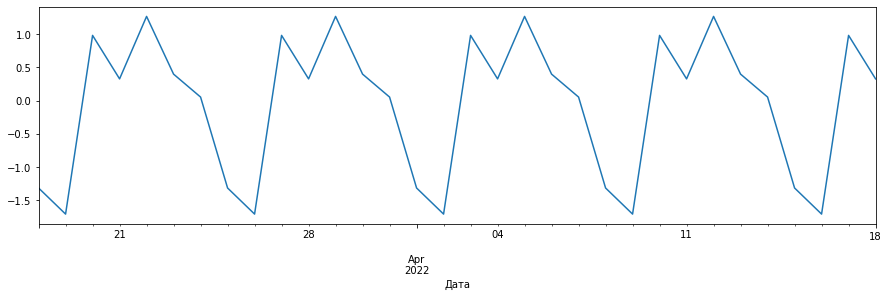

In [15]:
decomposed.seasonal['2022-03-18':'2022-04-18'].plot(figsize=(15, 4)) 

По тренду наблюдаем снижение продаж и еженедельные закономерности в изменении количества заказов. 

---------

In [16]:
data_analogi = pd.read_csv('/content/P11410122(18.03.2022 - 17.06.2022).csv', sep=';')

In [17]:
data_analogi

,Дата,Товаров,Товаров с продажами,Продаж,Выручка,Средняя цена,Ср. цена продажи,Комментарии,Рейтинг
0,2022-06-17,1703.0,662.0,4582,2155736,"907,4997064004698","470,47926669576606","99,9699863574352","4,6036834924965895"
1,2022-06-16,1605.0,673.0,4795,2246212,"892,0436137071652","468,4488008342023","101,30625","4,604166666666667"
2,2022-06-15,1703.0,705.0,5101,2472813,"910,9606576629477","484,77024112919037","99,36680327868852","4,602459016393443"
3,2022-06-14,1703.0,685.0,4798,2313175,"907,6893716970053","482,1123384743643","99,10184552289816","4,603554340396446"
4,2022-06-13,1703.0,700.0,5070,2465070,"909,3476218438051","486,20710059171597","98,79289131920711","4,604921394395078"
...,...,...,...,...,...,...,...,...,...
88,2022-03-21,1242.0,535.0,3378,1880196,"950,5483091787439","556,6003552397868","90,20924149956409","4,557105492589364"
89,2022-03-20,1242.0,583.0,3726,2111928,"948,4766505636071","566,8083735909823","90,20924149956409","4,557105492589364"
90,2022-03-19,1239.0,563.0,3664,2070245,"945,9233252623084","565,0231986899563","90,20924149956409","4,557105492589364"
91,2022-03-18,977.0,465.0,3214,1738184,"906,6714431934494","540,8164281269446","105,12301166489925","4,563096500530222"


In [18]:
data_analogi = data_analogi[2:92]

In [19]:
data_analogi = data_analogi.sort_values(by='Дата').reset_index(drop=True) 

In [20]:
data_analogi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Дата                 90 non-null     object 
 1   Товаров              90 non-null     float64
 2   Товаров с продажами  90 non-null     float64
 3   Продаж               90 non-null     int64  
 4   Выручка              90 non-null     int64  
 5   Средняя цена         90 non-null     object 
 6   Ср. цена продажи     90 non-null     object 
 7   Комментарии          90 non-null     object 
 8   Рейтинг              90 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.5+ KB


In [21]:
data_analogi['Дата'] = pd.to_datetime(data_analogi['Дата'], format='%Y-%m-%d')

In [22]:
data_analogi['Средняя цена'] = data_analogi['Средняя цена'].apply(lambda x: x.replace(',','.'))
data_analogi['Ср. цена продажи'] = data_analogi['Ср. цена продажи'].apply(lambda x: x.replace(',','.'))
data_analogi['Комментарии'] = data_analogi['Комментарии'].apply(lambda x: x.replace(',','.'))
data_analogi['Рейтинг'] = data_analogi['Рейтинг'].apply(lambda x: x.replace(',','.'))

In [23]:
data_analogi['Средняя цена'] = round(data_analogi['Средняя цена'].astype('float64'),2)
data_analogi['Ср. цена продажи'] = round(data_analogi['Ср. цена продажи'].astype('float64'),2)
data_analogi['Комментарии'] = round(data_analogi['Комментарии'].astype('float64'),2)
data_analogi['Рейтинг'] = round(data_analogi['Рейтинг'].astype('float64'),2)

In [24]:
data_analogi.columns = ['Дата', 'Товаров_аналог', 'Товаров_аналог_с_продажами', 'Продаж_аналогичных', 'Выручка',
       'Средняя_цена_аналог', 'Средняя_цена_продажи_аналог', 'Комментарии_аналог', 'Рейтинг_аналог']

In [25]:
#data_itog = data.merge(data_analogi, left_on='Дата', right_on='Дата')

In [26]:
#data_itog

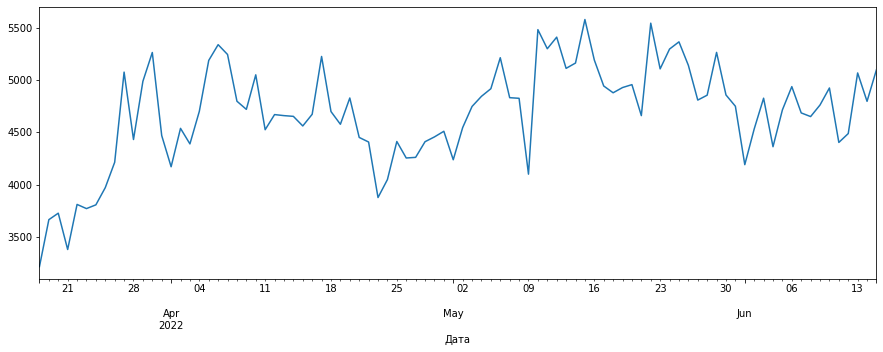

In [27]:
data_analogi.set_index('Дата')['Продаж_аналогичных'].plot(figsize=(15,5))

Проведем сезонную декомпозицию продаж.

In [28]:
decomposed = seasonal_decompose(data_analogi.set_index('Дата')['Продаж_аналогичных'])

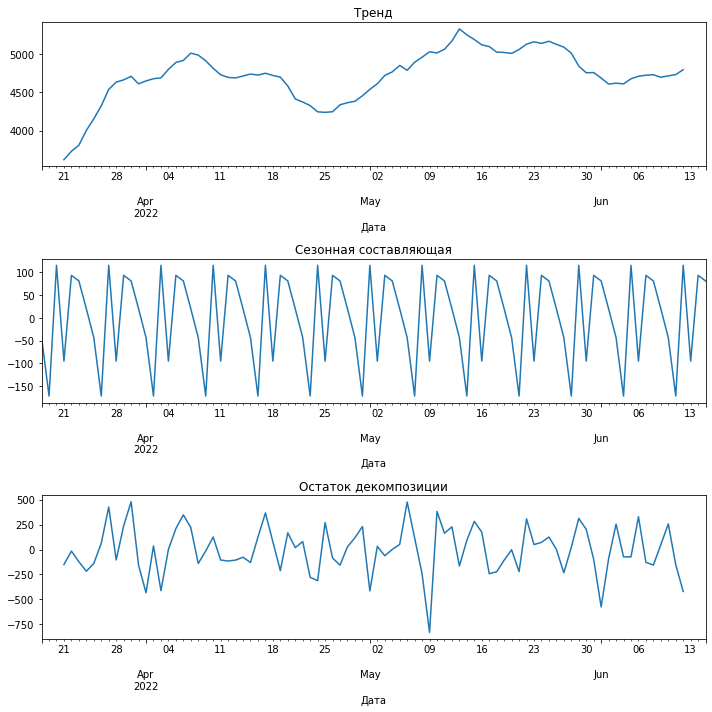

In [29]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток декомпозиции')

plt.tight_layout()

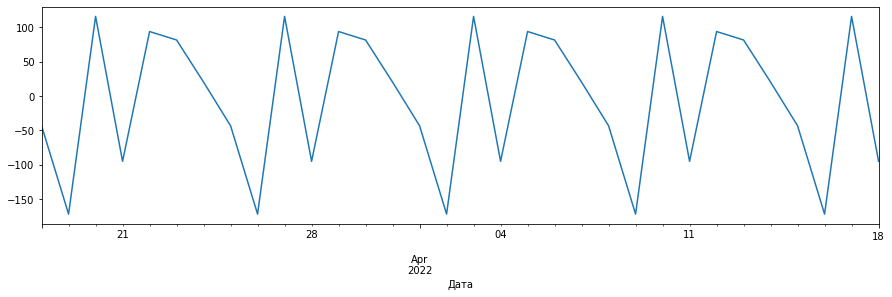

In [30]:
decomposed.seasonal['2022-03-18':'2022-04-18'].plot(figsize=(15, 4)) 

По тренду наблюдаем рост продаж аналогичных товаров и еженедельные закономерности в изменении количества заказов. 

------

-----------

Для построения модели прогнозирования продаж предварительно построим следующие прогнозы:

- предскажем среднюю цену продажи по аналогичным товарам.

- предскажем количество проданных аналогичных товаров.

----------

-----------

Предскажем среднюю цену продажи по аналогичным товарам.

In [31]:
data_analog_propnet = deepcopy(data_analogi[['Дата','Средняя_цена_продажи_аналог']])

In [32]:
data_analog_propnet

,Дата,Средняя_цена_продажи_аналог
0,2022-03-18,540.82
1,2022-03-19,565.02
2,2022-03-20,566.81
3,2022-03-21,556.60
4,2022-03-22,558.27
...,...,...
85,2022-06-11,470.74
86,2022-06-12,482.27
87,2022-06-13,486.21
88,2022-06-14,482.11


In [33]:
data_analog_propnet.columns = ['ds', 'y']

In [34]:
m_analog = Prophet()
m_analog.fit(data_analog_propnet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future_analog = m_analog.make_future_dataframe(periods=30)
future_analog.tail()

,ds
115,2022-07-11
116,2022-07-12
117,2022-07-13
118,2022-07-14
119,2022-07-15


In [36]:
forecast_analog = m_analog.predict(future_analog)
forecast_analog[['ds', 'yhat']].tail(30)

,ds,yhat
90,2022-06-16,470.703705
91,2022-06-17,469.426547
92,2022-06-18,472.682672
93,2022-06-19,471.752685
94,2022-06-20,475.124982
95,2022-06-21,468.954106
96,2022-06-22,466.939399
97,2022-06-23,466.455281
98,2022-06-24,465.178123
99,2022-06-25,468.434248


------------

---------------

Предскажем количество проданных аналогичных товаров.

In [37]:
data_analog_prod = deepcopy(data_analogi[['Дата','Продаж_аналогичных']])

In [38]:
data_analog_prod

,Дата,Продаж_аналогичных
0,2022-03-18,3214
1,2022-03-19,3664
2,2022-03-20,3726
3,2022-03-21,3378
4,2022-03-22,3810
...,...,...
85,2022-06-11,4404
86,2022-06-12,4489
87,2022-06-13,5070
88,2022-06-14,4798


In [39]:
data_analog_prod.columns = ['ds', 'y']

In [40]:
m_analog_prod = Prophet()
m_analog_prod.fit(data_analog_prod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future_analog_prod = m_analog_prod.make_future_dataframe(periods=30)
future_analog_prod.tail()

,ds
115,2022-07-11
116,2022-07-12
117,2022-07-13
118,2022-07-14
119,2022-07-15


In [42]:
forecast_analog_prod = m_analog_prod.predict(future_analog_prod)
forecast_analog_prod[['ds', 'yhat']].tail(30)

,ds,yhat
90,2022-06-16,4961.580167
91,2022-06-17,4834.616308
92,2022-06-18,4755.444669
93,2022-06-19,5034.436234
94,2022-06-20,4857.769427
95,2022-06-21,5024.042941
96,2022-06-22,5038.147637
97,2022-06-23,4973.961683
98,2022-06-24,4846.997824
99,2022-06-25,4767.826185


-----------

------

Предскажем продажи на 30 дней вперед (для прогноза предоставлен слишком маленький период исторических данных).

Среднюю цену и количество продаж аналогичных товаров мы предсаказали выше. 

Зафиксируем нашу цену на продажу товара на уровне 2022-06-15. 

Также в модель добавим признак "день недели", так как наблюдается еженедельная зависимость.

В связи с небольшим объемом выборки ограничимся этими признаками.

При увеличении объема исторических данных имеет смысл ввести признаки "праздничный день", "день", "месяц", "год", "предыдущее значение", "скользящее среднее" и др.

In [43]:
data_profnet = deepcopy(data[['Дата','Продажи']])

In [44]:
data_profnet

,Дата,Продажи
0,2022-03-18,2
1,2022-03-19,7
2,2022-03-20,5
3,2022-03-21,7
4,2022-03-22,10
...,...,...
85,2022-06-11,3
86,2022-06-12,6
87,2022-06-13,3
88,2022-06-14,1


In [45]:
data_profnet.columns = ['ds', 'y']

In [46]:
def avg_price_analog(ds): # Средняя_цена_продажи_аналог
     
    if data_profnet.loc[data_profnet['ds'] == ds]['avg_price'].empty:
        return forecast_analog.loc[forecast_analog['ds'] == ds]['yhat'].values[0]
    else:
        return (data_analogi.loc[data_analogi['Дата'] == ds]['Средняя_цена_продажи_аналог']).values[0]
   
    return 0

In [47]:
def prod_analog(ds): # Продаж_аналогичных
     
    if data_profnet.loc[data_profnet['ds'] == ds]['prod'].empty:
        return forecast_analog_prod.loc[forecast_analog_prod['ds'] == ds]['yhat'].values[0]
    else:
        return (data_analogi.loc[data_analogi['Дата'] == ds]['Продаж_аналогичных']).values[0]
   
    return 0

In [48]:
def price_future(ds): # фиксируем цену на месяц 
     
    if data_profnet.loc[data_profnet['ds'] == ds]['price'].empty:
        return 561
    else:
        return (data.loc[data_analogi['Дата'] == ds]['Цена_со_скидкой']).values[0]
   
    return 0

In [49]:
m = Prophet()

In [50]:
m.add_regressor('avg_price')

In [51]:
m.add_regressor('prod')

In [52]:
m.add_regressor('price')

In [53]:
m.add_regressor('day_of_week')

In [54]:
data_profnet['avg_price'] = deepcopy(data_analogi['Средняя_цена_продажи_аналог'])

In [55]:
data_profnet['prod'] = deepcopy(data_analogi['Продаж_аналогичных'])

In [56]:
data_profnet['price'] = deepcopy(data['Цена_со_скидкой'])

In [57]:
data_profnet['day_of_week'] = data_profnet['ds'].dt.dayofweek

In [58]:
m.fit(data_profnet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future = m.make_future_dataframe(periods=30)

In [60]:
future['avg_price'] = future['ds'].apply(avg_price_analog)

In [61]:
future['prod'] = future['ds'].apply(prod_analog)

In [62]:
future['price'] = future['ds'].apply(price_future)

In [63]:
future['day_of_week'] = future['ds'].dt.dayofweek

In [64]:
forecast = m.predict(future)

In [65]:
forecast.loc[(forecast.yhat<0),'yhat'] = 0 

In [66]:
forecast['round_yhat'] = round(forecast['yhat'])

In [67]:
forecast[['ds', 'round_yhat']].tail(30)

,ds,round_yhat
90,2022-06-16,2.0
91,2022-06-17,0.0
92,2022-06-18,0.0
93,2022-06-19,3.0
94,2022-06-20,2.0
95,2022-06-21,3.0
96,2022-06-22,2.0
97,2022-06-23,1.0
98,2022-06-24,0.0
99,2022-06-25,0.0


Реальные продажи:

2022-06-19	2

2022-06-18	1

2022-06-17	4

2022-06-16	6

Считаю, что для анализа и прогнозирования с помощью примененной модели Prophnet недостаточно данных.